In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 100)

In [2]:
# read given csv file to view sample data
bday = pd.read_csv('day.csv')
bday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#summary of all dataset columns
bday.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
bday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# checking null values in dataset
bday.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## No missing data observed.

In [6]:
# Renaming some columns for better understanding

bday.rename(columns={'hum':'humidity','cnt':'count','atemp':'Feel Like Temp'},inplace=True)

In [7]:
bday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,Feel Like Temp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,Feel Like Temp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Mapping variables season, month, weathersit, weekday

bday['season']=bday.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bday['mnth']=bday.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bday['weathersit']=bday.weathersit.map({1: 'Clear',2:'Mist',3:'Light Snow'})
bday['weekday']=bday.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
#bday['yr']=bday.yr.map({0:'2018',1:'2019'})
#bday['holiday']=bday.holiday.map({0:'No',1:'Yes'})
#bday['workingday']=bday.workingday.map({0:'No',1:'Yes'})
bday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,Feel Like Temp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Visualisation

In [10]:
import matplotlib.pyplot as plot
import seaborn as seab

## Visualising numeric variables 

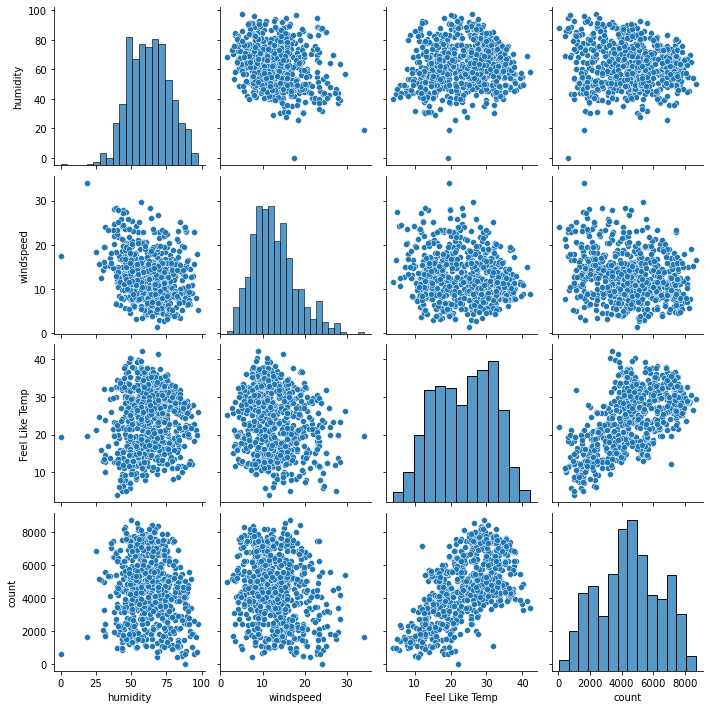

In [11]:
seab.pairplot(bday, vars=[ "humidity",'windspeed','Feel Like Temp','count'])
plot.show()

# # Visualising categorical variables

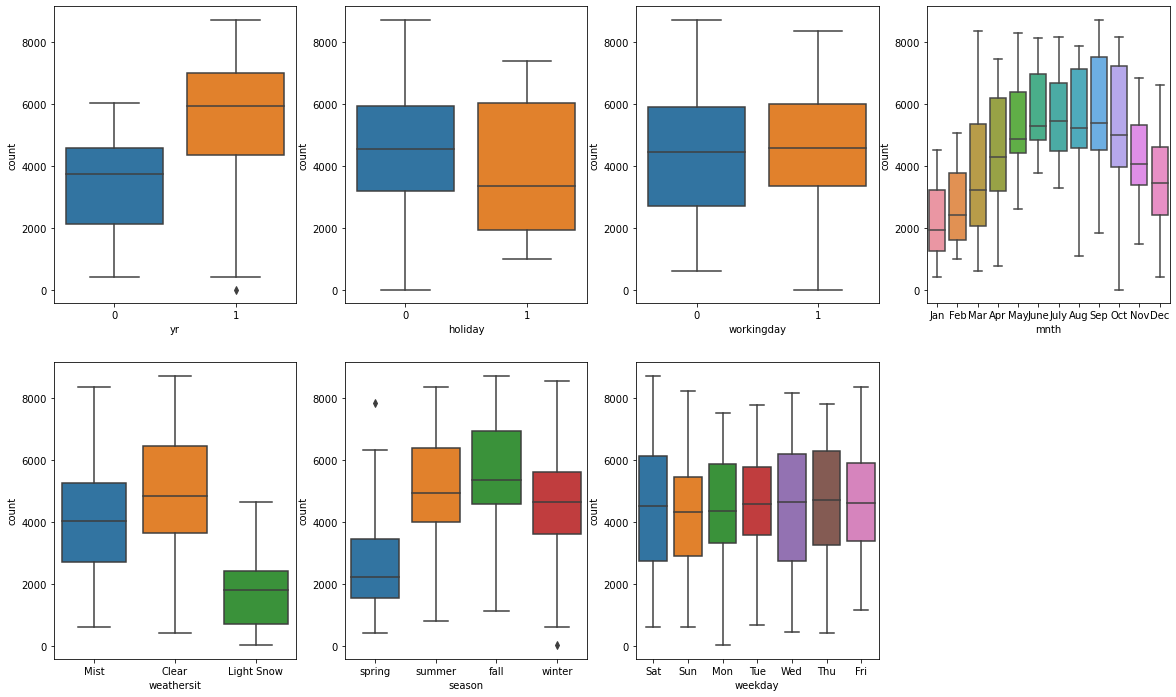

In [12]:
plot.figure(figsize=(20, 12))

plot.subplot(2,4,1)
seab.boxplot(x = 'yr', y = 'count', data = bday)

plot.subplot(2,4,2)
seab.boxplot(x = 'holiday', y = 'count', data = bday)

plot.subplot(2,4,3)
seab.boxplot(x = 'workingday', y = 'count', data = bday)

plot.subplot(2,4,4)
seab.boxplot(x = 'mnth', y = 'count', data = bday)

plot.subplot(2,4,5)
seab.boxplot(x = 'weathersit', y = 'count', data = bday)

plot.subplot(2,4,6)
seab.boxplot(x = 'season', y = 'count', data = bday)

plot.subplot(2,4,7)
seab.boxplot(x = 'weekday', y = 'count', data = bday)

plot.show()

### Bike Rentals are more :
####  - In year 2019 as compare to year 2018
####  - When weather is clear
####  - During fall season followed by summer season.
####  - In month of september.
####  - on saturday, wednesday and thursday


## Univariate Analysis

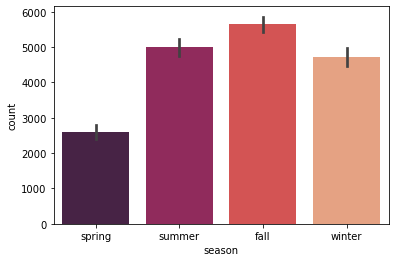

In [13]:
#Relation between season and count of bike rentals

seab.barplot('season','count',data=bday,palette="rocket",)
plot.show()

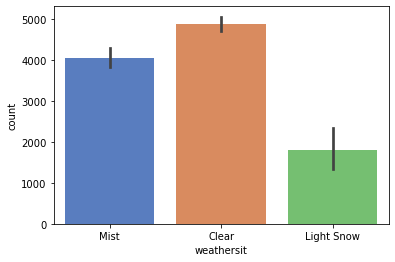

In [14]:
#Relation between weather and count of bike rentals
seab.barplot('weathersit','count',palette="muted",data=bday)
plot.show()

### Bike rental are high in clear whether.

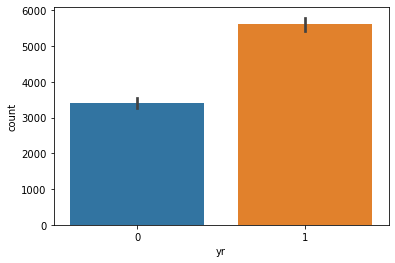

In [15]:
#Relation between Year and count of bike rentals
seab.barplot('yr','count',data=bday)
plot.show()

### Bike Rentals are more in the year 2019 compared to 2018

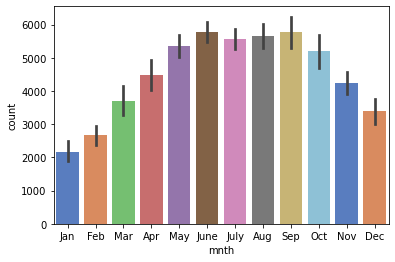

In [16]:
#Relation between month and count

seab.barplot('mnth','count',data=bday,palette='muted')
plot.show()

### Bike Rentals are high between June to September

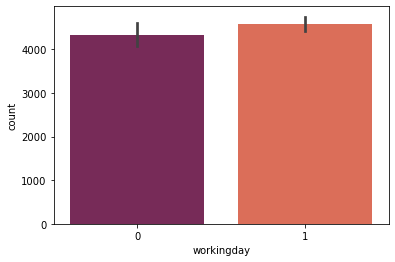

In [17]:
#Relation between workingday and count of bike rentals

seab.barplot('workingday','count',data=bday,palette="rocket",)
plot.show()

### Bike Rentals are high on working day.

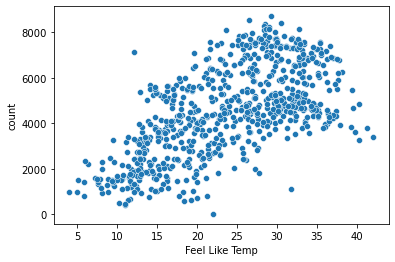

In [18]:
#scatter plot for temperature to count
seab.scatterplot(x='Feel Like Temp',y='count' ,data=bday)
plot.show()

### Bike rentals are high if tempature is between 20 and 35.

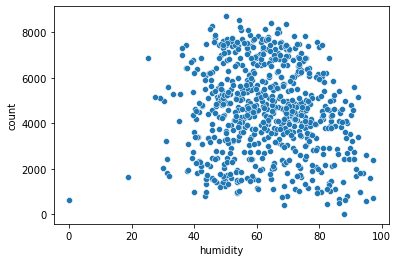

In [19]:
seab.scatterplot(x='humidity', y='count',data=bday)
plot.show()

### Bike rentals high if humidity is greater than 40.

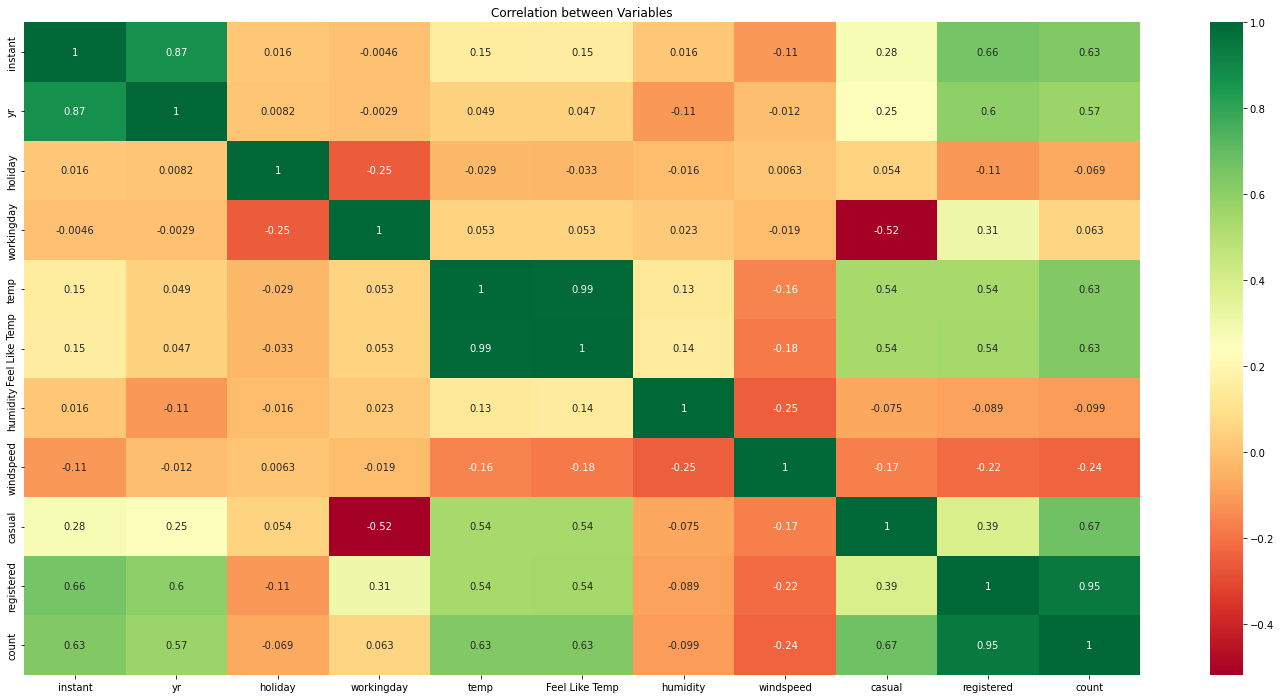

In [20]:
#Heatmap to see correlation between variables
plot.figure(figsize=(25, 12))
seab.heatmap(bday.corr(), cmap='RdYlGn', annot = True)
plot.title("Correlation between Variables")
plot.show()

### correlation between temp, Feel like Temp is 0.99 so dropping temp variable
### correlation between resigstered, count is 0.95 so dropping resigstered and casual variables as casual is also subset of count with correlation 0.67.
### Similarly instant and dteday variables are not so significant so dropping them as well.


In [21]:
# Dropping the instant,dteday,casual,temp and registered columns.

bday.drop(['instant','dteday','casual','registered','temp'],axis=1,inplace=True)

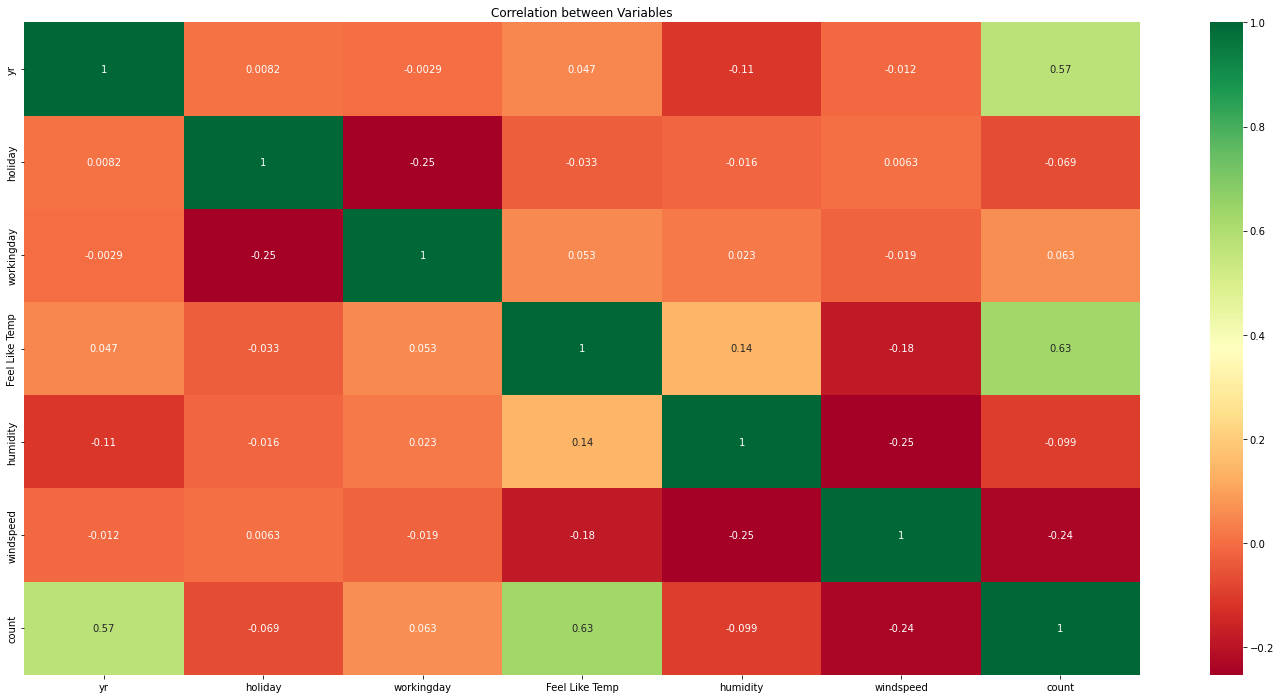

In [22]:
#Heatmap to see correlation between variables after dropping unwanted variables
plot.figure(figsize=(25, 12))
seab.heatmap(bday.corr(), cmap='RdYlGn', annot = True)
plot.title("Correlation between Variables")
plot.show()

# Data preparation

In [23]:
# # Dummy variables for month, season, weathersit, weekday)
months=pd.get_dummies(bday.mnth,drop_first=False)
weekdays=pd.get_dummies(bday.weekday,drop_first=False)
weather_sit=pd.get_dummies(bday.weathersit,drop_first=False)
seasons=pd.get_dummies(bday.season,drop_first=False)

In [24]:
# Combining the results to the original bike dataframe

bday=pd.concat([months,weekdays,weather_sit,seasons,bday],axis=1)
bday.head()

,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist,fall,spring,summer,winter,season,yr,mnth,holiday,weekday,workingday,weathersit,Feel Like Temp,humidity,windspeed,count
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,spring,0,Jan,0,Sat,0,Mist,18.18125,80.5833,10.749882,985
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,spring,0,Jan,0,Sun,0,Mist,17.68695,69.6087,16.652113,801
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


In [25]:
# Drop  column 'month','weekday','weathersit', 'season'

bday.drop(['mnth','weekday','weathersit','season'], axis = 1, inplace = True)
bday.head()

,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist,fall,spring,summer,winter,yr,holiday,workingday,Feel Like Temp,humidity,windspeed,count
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,18.18125,80.5833,10.749882,985
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,17.68695,69.6087,16.652113,801
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,9.47025,43.7273,16.636703,1349
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,10.60610,59.0435,10.739832,1562
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,11.46350,43.6957,12.522300,1600


In [26]:
bday.shape

(730, 33)

### Splitting the data into training and testing sets

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively


bday_train, bday_test = train_test_split(bday, train_size = 0.7, random_state = 100)

In [28]:
print(bday.shape)
print(bday_train.shape)
print(bday_test.shape)

(730, 33)
(510, 33)
(220, 33)


In [29]:
bday_train.head()

,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist,fall,spring,summer,winter,yr,holiday,workingday,Feel Like Temp,humidity,windspeed,count
576,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,33.1448,70.4167,11.083475,7216
426,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,20.6746,62.1250,10.792293,4066
728,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,11.5850,48.3333,23.500518,1796
482,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,18.8752,48.9583,8.708325,4220
111,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,16.0977,72.9583,14.707907,1683


In [30]:
bday_test.head()

,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist,fall,spring,summer,winter,yr,holiday,workingday,Feel Like Temp,humidity,windspeed,count
184,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,33.27085,63.7917,5.459106,6043
535,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,36.04875,59.2083,7.625404,6211
299,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,22.85230,81.2917,13.250121,2659
221,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,34.24915,42.4167,13.417286,4780
152,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,32.19710,30.5000,19.583229,4968


In [31]:
bday_train.columns

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Clear',
       'Light Snow', 'Mist', 'fall', 'spring', 'summer', 'winter', 'yr',
       'holiday', 'workingday', 'Feel Like Temp', 'humidity', 'windspeed',
       'count'],
      dtype='object')

In [32]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [33]:
num_vars=['Feel Like Temp','humidity','windspeed','count']
bday_train[num_vars] = scaler.fit_transform(bday_train[num_vars])
#bday_test[num_vars] = scaler.fit_transform(bday_test[num_vars])

bday_train.head()
#bday_test.head()



,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist,fall,spring,summer,winter,yr,holiday,workingday,Feel Like Temp,humidity,windspeed,count
576,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0.438975,0.640189,0.255342,0.465255
728,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0.200348,0.498067,0.663106,0.204096
482,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0.391735,0.504508,0.188475,0.482973
111,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.318819,0.751824,0.380981,0.191095


In [34]:
bday_train.describe()
#bday_test.describe()


,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist,fall,spring,summer,winter,yr,holiday,workingday,Feel Like Temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.078431,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.127451,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.029412,0.345098,0.262745,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499
std,0.269113,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.333805,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.169124,0.475867,0.440557,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
#Divide the data into X and y
y_train = bday_train.pop('count')
x_train = bday_train



In [36]:
x_train.head()

,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist,fall,spring,summer,winter,yr,holiday,workingday,Feel Like Temp,humidity,windspeed
576,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0.766351,0.725633,0.264686
426,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0.438975,0.640189,0.255342
728,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0.200348,0.498067,0.663106
482,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0.391735,0.504508,0.188475
111,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.318819,0.751824,0.380981


In [37]:
y_train.head()


576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

### Building a Linear model

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Using RFE approach for  feature selection

lm_train = LinearRegression()
lm_train.fit(x_train, y_train)


rfe_train = RFE(lm_train, 15)            
rfe_train = rfe_train.fit(x_train, y_train)


In [40]:

list(zip(x_train.columns,rfe_train.support_,rfe_train.ranking_))


[('Apr', False, 4),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 6),
 ('June', False, 7),
 ('Mar', False, 3),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', True, 1),
 ('Sep', False, 8),
 ('Fri', False, 14),
 ('Mon', False, 12),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('Clear', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('fall', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', False, 16),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('Feel Like Temp', False, 15),
 ('humidity', False, 18),
 ('windspeed', False, 17)]

In [41]:
#Columns where RFE support is True
col = x_train.columns[rfe_train.support_]
col

Index(['Dec', 'Jan', 'Nov', 'Oct', 'Sat', 'Sun', 'Clear', 'Light Snow', 'Mist',
       'fall', 'spring', 'summer', 'winter', 'holiday', 'workingday'],
      dtype='object')

In [42]:
#Columns where RFE support is False
col = x_train.columns[~rfe_train.support_]
col

Index(['Apr', 'Aug', 'Feb', 'July', 'June', 'Mar', 'May', 'Sep', 'Fri', 'Mon',
       'Thu', 'Tue', 'Wed', 'yr', 'Feel Like Temp', 'humidity', 'windspeed'],
      dtype='object')

### Building model using statsmodel

In [43]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]


In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)



In [45]:
# Running the linear model 
lm_train = sm.OLS(y_train,x_train_rfe).fit()

lm_train.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     97.36
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.85e-145
Time:                        22:07:55   Log-Likelihood:                 414.61
No. Observations:                 510   AIC:                            -793.2
Df Residuals:                     492   BIC:                            -717.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3389      0.032     10.548      0.000       0.276       0.402
Apr               -0.0108      0.021     -0.524      0.600      -0.051       0.030
Aug               -0.0646      0.025     -2.613      0.009      -0.113      -0.016
Feb               -0.0854      0.021     -4.058      0.000      -0.127      -0.044
July              -0.1465      0.028     -5.161      0.000      -0.202      -0.091
June              -0.0574      0.026     -2.212      0.027      -0.108      -0.006
Mar               -0.0404      0.018     -2.244      0.025      -0.076      -0.005
May                0.0003      0.022      0.015      0.988      -0.043       0.044
Sep                0.0261      0.023      1.131      0.259      -0.019       0.071
Fri                0.0224      0.016      1.377      0.169      -0.010       0.054
Mon               -0.0071      0.015     -0.460      0.646      -0.037       0.023
Thu                0.0009      0.016      0.054      0.957      -0.031       0.032
Tue                0.0088      0.016      0.548      0.584      -0.023       0.040
Wed                0.0083      0.015      0.551      0.582      -0.021       0.038
yr                 0.2296      0.010     23.313      0.000       0.210       0.249
Feel Like Temp     0.7068      0.045     15.875      0.000       0.619       0.794
humidity          -0.3217      0.037     -8.668      0.000      -0.395      -0.249
windspeed         -0.2168      0.031     -7.025      0.000      -0.277      -0.156
==============================================================================
Omnibus:                       43.810   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.667
Skew:                          -0.570   Prob(JB):                     1.01e-16
Kurtosis:                       4.472   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Variance Inflation Factor (VIF)

In [46]:
#Drop the constant term B0
x_train_rfe = x_train_rfe.drop(['const'], axis=1)
#x_test_rfe = x_test_rfe.drop(['const'], axis=1)


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Feel Like Temp,23.64
15,humidity,12.15
16,windspeed,4.08
3,July,2.61
1,Aug,2.47
4,June,2.20
13,yr,2.05
7,Sep,1.80
6,May,1.72
12,Wed,1.52


In [49]:
x_train_rfe.head()

,Apr,Aug,Feb,July,June,Mar,May,Sep,Fri,Mon,Thu,Tue,Wed,yr,Feel Like Temp,humidity,windspeed
576,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.766351,0.725633,0.264686
426,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.438975,0.640189,0.255342
728,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.200348,0.498067,0.663106
482,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.391735,0.504508,0.188475
111,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.318819,0.751824,0.380981


In [50]:
#Column 'Feel Like Temp' has a very high VIF so dropping column

x_train_1=x_train_rfe.drop(['Feel Like Temp'],axis=1)


### Rebuilding the model without 'Feel Like Temp'

In [51]:
#Build a model
x_train_lm1 = sm.add_constant(x_train_1)
lm_train1 = sm.OLS(y_train,x_train_lm1).fit()
lm_train1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     58.11
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.22e-102
Time:                        22:07:56   Log-Likelihood:                 309.15
No. Observations:                 510   AIC:                            -584.3
Df Residuals:                     493   BIC:                            -512.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4958      0.038     13.202      0.000       0.422       0.570
Apr            0.0918      0.024      3.803      0.000       0.044       0.139
Aug            0.2073      0.022      9.479      0.000       0.164       0.250
Feb           -0.1277      0.026     -4.977      0.000      -0.178      -0.077
July           0.1804      0.024      7.511      0.000       0.133       0.228
June           0.2142      0.024      8.927      0.000       0.167       0.261
Mar        -8.775e-06      0.022     -0.000      1.000      -0.043       0.043
May            0.1835      0.023      7.955      0.000       0.138       0.229
Sep            0.2307      0.024      9.802      0.000       0.184       0.277
Fri            0.0187      0.020      0.939      0.348      -0.020       0.058
Mon           -0.0038      0.019     -0.204      0.838      -0.041       0.033
Thu            0.0103      0.020      0.522      0.602      -0.028       0.049
Tue            0.0194      0.020      0.980      0.328      -0.019       0.058
Wed            0.0124      0.019      0.669      0.504      -0.024       0.049
yr             0.2490      0.012     20.744      0.000       0.225       0.273
humidity      -0.1849      0.044     -4.169      0.000      -0.272      -0.098
windspeed     -0.2460      0.038     -6.501      0.000      -0.320      -0.172
==============================================================================
Omnibus:                       10.034   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               12.277
Skew:                          -0.221   Prob(JB):                      0.00216
Kurtosis:                       3.619   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#Drop the constant
x_train_lm1 = x_train_lm1.drop(['const'], axis=1)


In [53]:
vif = pd.DataFrame()
x = x_train_1
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
14,humidity,6.12
15,windspeed,4.04
13,yr,1.98
12,Wed,1.52
9,Mon,1.48
11,Tue,1.43
10,Thu,1.40
8,Fri,1.39
5,Mar,1.29
1,Aug,1.28


### Column 'humidity' has a VIF > 5, so dropping column and rebuilding model without humidity

In [54]:
# Dropping column 'humidity'
x_train_2=x_train_lm1.drop(['humidity'],axis=1)


In [55]:
#Build a model
x_train_lm2 = sm.add_constant(x_train_2)
lm_train2 = sm.OLS(y_train,x_train_lm2).fit()
lm_train2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     58.87
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.28e-99
Time:                        22:07:56   Log-Likelihood:                 300.31
No. Observations:                 510   AIC:                            -568.6
Df Residuals:                     494   BIC:                            -500.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3599      0.019     18.965      0.000       0.323       0.397
Apr            0.1033      0.024      4.235      0.000       0.055       0.151
Aug            0.2075      0.022      9.330      0.000       0.164       0.251
Feb           -0.1142      0.026     -4.414      0.000      -0.165      -0.063
July           0.1899      0.024      7.817      0.000       0.142       0.238
June           0.2268      0.024      9.370      0.000       0.179       0.274
Mar            0.0094      0.022      0.427      0.670      -0.034       0.053
May            0.1745      0.023      7.477      0.000       0.129       0.220
Sep            0.2221      0.024      9.320      0.000       0.175       0.269
Fri            0.0198      0.020      0.978      0.328      -0.020       0.060
Mon           -0.0060      0.019     -0.313      0.754      -0.044       0.032
Thu            0.0132      0.020      0.659      0.510      -0.026       0.052
Tue            0.0181      0.020      0.900      0.369      -0.021       0.058
Wed            0.0099      0.019      0.525      0.600      -0.027       0.047
yr             0.2532      0.012     20.819      0.000       0.229       0.277
windspeed     -0.2122      0.038     -5.648      0.000      -0.286      -0.138
==============================================================================
Omnibus:                       15.350   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.120
Skew:                          -0.311   Prob(JB):                     7.05e-05
Kurtosis:                       3.716   Cond. No.                         8.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
x = x_train_2
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
14,windspeed,3.04
13,yr,1.89
12,Wed,1.37
9,Mon,1.34
11,Tue,1.32
10,Thu,1.30
5,Mar,1.29
8,Fri,1.29
0,Apr,1.27
1,Aug,1.21


### All the variables have VIF are < 5, so it is perfect now.

# Residual Analysis of the train data

In [57]:
x_train_lm2

,const,Apr,Aug,Feb,July,June,Mar,May,Sep,Fri,Mon,Thu,Tue,Wed,yr,windspeed
576,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.264686
426,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.255342
728,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.663106
482,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.188475
111,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.187140
53,1.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.111379
350,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.431816
79,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.529881


In [58]:
x_train_2.head()

,Apr,Aug,Feb,July,June,Mar,May,Sep,Fri,Mon,Thu,Tue,Wed,yr,windspeed
576,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.264686
426,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.255342
728,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.663106
482,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.188475
111,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.380981


In [59]:
num_vars=['Feel Like Temp','humidity','windspeed','count']

bday_test[num_vars]= scaler.transform(bday_test[num_vars])

bday_test.head()

,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist,fall,spring,summer,winter,yr,holiday,workingday,Feel Like Temp,humidity,windspeed,count
184,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0.769660,0.657364,0.084219,0.692706
535,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0.842587,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0.496145,0.837699,0.334206,0.303382
221,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0.795343,0.437098,0.339570,0.547400
152,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0.741471,0.314298,0.537414,0.569029


In [60]:
#Dividing into X_test and y_test


y_test = bday_test.pop('count')
x_test = bday_test
x_test.describe()

,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist,fall,spring,summer,winter,yr,holiday,workingday,Feel Like Temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.090909,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.177273,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.027273,0.318182,0.245455,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293
std,0.288135,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.382770,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.163248,0.466833,0.431338,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474


In [61]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[x_train_2.columns]

# Adding a constant variable 
x_test_new1 = sm.add_constant(x_test_new)
x_test_new1.head()



,const,Apr,Aug,Feb,July,June,Mar,May,Sep,Fri,Mon,Thu,Tue,Wed,yr,windspeed
184,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.084219
535,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.153728
299,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.334206
221,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.339570
152,1.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.537414


### Making Predictions

In [62]:
# Making predictions

y_pred_test = lm_train2.predict(x_test_new1)



In [63]:
#Evaluate R-square for test
from sklearn.metrics import r2_score

r2_score(y_test,y_pred_test)


0.5938515748267441

In [64]:
Adj_r2=1-(1-0.5938515)*(11-1)/(11-1-1)
print(Adj_r2)

0.5487238888888888


### Model Evaluation

Text(0, 0.5, 'Predictions')

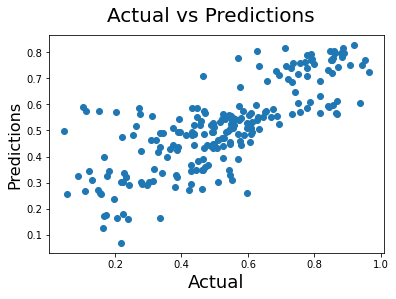

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plot.figure()
plot.scatter(y_test,y_pred_test)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plot.xlabel('Actual', fontsize=18)                          # X-label
plot.ylabel('Predictions', fontsize=16)                          # Y-label

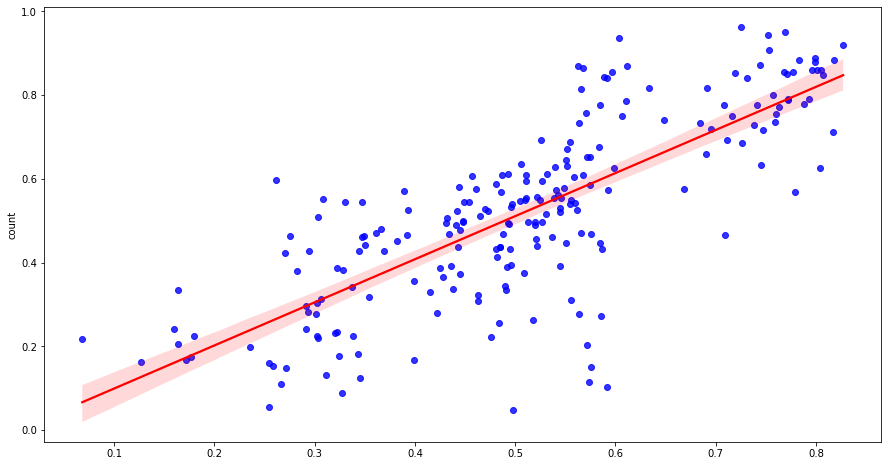

In [66]:
#Regression plot
plot.figure(figsize=(15,8))
seab.regplot(x=y_pred_test, y=y_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plot.show()

## Conclusion 

- Below variables are seen influencing and beneficial for Bike Rental demand:

     - Month - Demand is high during Fall season (June to September).

     - Temprature - Bike rentals are high if tempature is between 20 and 35.

     - Humidity - Bike rentals are high if humidity > 40

     - weathersit - Bike rentals are high if whether is clear.

     - Workingday - Bike rentals are high on workingday.

- The temperature variable is having the highest coefficient 0.7068, which means that temperature increase is directly propotanate to bike rental demand.






## Recommendations 

- Temperature is main factor for making decision
- Demand for bikes was more in 2019 than 2018, which means bike rental service popularity is incresing. Company can provide discounts for regular customers to retain and increase regular customer base.
- Working days has good influence on bike rentals. so its stongly recommended to arrange more bikes during working days. 